## MALARIA DETECTION FROM CELL SAMPLES

In [1]:
import tensorflow as tf

In [2]:
#import neccesary libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import save_model,load_model,Model
from tensorflow.keras.layers import Conv2D,MaxPool2D,Input,Dropout,Dense, Flatten
from tensorflow.keras.preprocessing.image import img_to_array,array_to_img,load_img 
import numpy as np
import os
import matplotlib.pyplot as plt
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import Callback,EarlyStopping,ReduceLROnPlateau
from tensorflow.keras.metrics import SparseCategoricalAccuracy
from tensorflow.keras.preprocessing import image
print('Setup Complete!')

Setup Complete!


In [3]:
#augment the data to create more data
train=ImageDataGenerator(horizontal_flip=True,rescale=1/255, height_shift_range=0.1,width_shift_range=0.1, rotation_range=20,
                         shear_range=0.1, zoom_range=0.1, vertical_flip=True)
test=ImageDataGenerator(rescale=1/255)

In [4]:
#load the images
train_data=train.flow_from_directory(r'D:\ML DATA\Projects\Data Science Portfolio\Image classification\Malaria\Dataset\Dataset\Train',
                                    target_size=(200, 200),batch_size=16,class_mode='binary')
test_data=test.flow_from_directory(r'D:\ML DATA\Projects\Data Science Portfolio\Image classification\Malaria\Dataset\Dataset\Test',
                                    target_size=(200, 200),batch_size=16,class_mode='binary')

Found 416 images belonging to 2 classes.
Found 134 images belonging to 2 classes.


In [5]:
class_names = train_data.class_indices
print(class_names)

{'Parasite': 0, 'Uninfected': 1}


In [6]:
#build the CNN model Sequentially
model=tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(filters=16,kernel_size=(3,3),activation='relu',kernel_regularizer='l2',input_shape=(200,200,3)),
      tf.keras.layers.MaxPool2D(),
    
      tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',kernel_regularizer='l2'),
      tf.keras.layers.MaxPool2D(),
    
      tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',kernel_regularizer='l2'),
    
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dropout(0.5),
    
      tf.keras.layers.Dense(512,activation='relu'),
      tf.keras.layers.Dense(1,activation='sigmoid')
      
])

In [7]:
#instantiate model and check the summary 
#model = my_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 64)        18496     
_________________________________________________________________
flatten (Flatten)            (None, 135424)            0         
_________________________________________________________________
dropout (Dropout)            (None, 135424)            0

In [8]:
#Compiling the model
model.compile(optimizer=Adam(),loss='binary_crossentropy', metrics=['accuracy'])

In [9]:
#callbacks
early_stopping = EarlyStopping(monitor='val_accuracy',patience=20)
reduce = ReduceLROnPlateau(monitor='val_accuracy')

In [10]:
#train the model, display loss and accuracies
model_train = model.fit_generator(train_data,epochs=50,validation_data=test_data,callbacks=(early_stopping,reduce))

C:\Users\ampad\anaconda3\envs\tfod\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
26/26 [==============================] - 7s 180ms/step - loss: 3.8518 - accuracy: 0.4923 - val_loss: 1.3756 - val_accuracy: 0.3209
Epoch 2/50
26/26 [==============================] - 4s 160ms/step - loss: 1.0913 - accuracy: 0.6469 - val_loss: 1.3274 - val_accuracy: 0.3209
Epoch 3/50
26/26 [==============================] - 4s 164ms/step - loss: 0.9628 - accuracy: 0.6745 - val_loss: 1.1168 - val_accuracy: 0.4478
Epoch 4/50
26/26 [==============================] - 5s 176ms/step - loss: 0.9945 - accuracy: 0.6019 - val_loss: 1.1808 - val_accuracy: 0.3209
Epoch 5/50
26/26 [==============================] - 5s 174ms/step - loss: 0.8921 - accuracy: 0.6509 - val_loss: 1.2415 - val_accuracy: 0.2836
Epoch 6/50
26/26 [==============================] - 5s 176ms/step - loss: 0.8397 - accuracy: 0.7259 - val_loss: 1.0315 - val_accuracy: 0.3731
Epoch 7/50
26/26 [==============================] - 5s 187ms/step - loss: 0.7731 - accuracy: 0.7613 - val_loss: 1.3257 - val_accuracy: 0.3582
Epoch 

In [11]:
final_loss, final_accuracy = model.evaluate(test_data)
print('Final loss: {:.2f}'.format(final_loss))
print('Final accuracy: {:.2f}%'.format(final_accuracy * 100))

9/9 [==============================] - 0s 33ms/step - loss: 0.4604 - accuracy: 0.8806
Final loss: 0.46
Final accuracy: 88.06%


In [12]:
model_train.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])

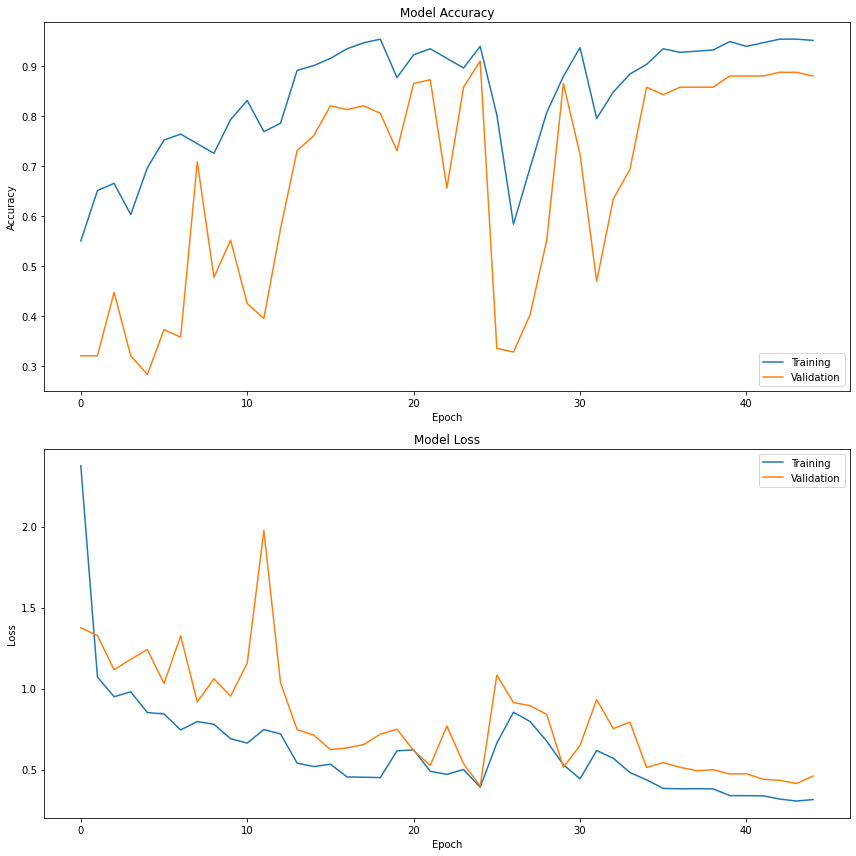

In [13]:
#display loss and accuracy graph
plt.figure(1,figsize=(12,12))

# summarize history for accuracy

plt.subplot(211)
plt.plot(model_train.history['accuracy'])
plt.plot(model_train.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')

# summarize history for loss

plt.subplot(212)
plt.plot(model_train.history['loss'])
plt.plot(model_train.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

plt.tight_layout()

plt.show()

In [14]:
#save the model for later use
model.save('malaria_detection_model.h5',r'D:\ML DATA\Projects\Data Science Portfolio\Image classification\Malaria\Dataset')


In [18]:
#simulate production environment for prediction
test_image=image.load_img(r'D:\ML DATA\Projects\Data Science Portfolio\Image classification\Malaria\Dataset\Dataset\Test\Parasite\C39P4thinF_original_IMG_20150622_110115_cell_136.png',target_size=(200,200,3))
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image, axis=0)
result=model.predict(test_image)
if result [0][0]==0:
    prediction='parasite'
else:
    prediction='healthy'
print(prediction)    

parasite


In [19]:
!pip install anvil-uplink

  Using cached argparse-1.4.0-py2.py3-none-any.whl (23 kB)


In [24]:
import anvil.server

anvil.server.connect("TARZ2WHOATT5BK5GJI5PPPIH-43EAHSQTVOWUO3BQ")

Disconnecting from previous connection first...
Connecting to wss://anvil.works/uplink
Anvil websocket closed (code 1000, reason=b'')
Anvil websocket open
Connected to "Default environment (dev)" as SERVER


In [27]:
pip install Pillow

Note: you may need to restart the kernel to use updated packages.


In [29]:
import PIL

In [33]:
import anvil.media
@anvil.server.callable
def make_prediction(file):
    with anvil.media.TempFile(file) as filename:
        
        img=image.load_img(filename)
        img = img.resize((200,200), resample=PIL.Image.BICUBIC)
        arr=image.img_to_array(img)
        arr=np.expand_dims(arr, axis=0)
        arr=arr/255
    
    score= model.predict(arr)
    
    return ('parasite' if score < 0.5  else 'healthy' , float(score))